# Plots for the Paper

This notebook provides scripts which are used to plot the Pareto Curves in the paper. This notebook visualizes the various csvs which contain the main results from our analyses.

The Phase 1 section reproduces Figure 2 from the paper by analyzing the files `celeba_val_phase1.csv` and `vgg_val_phase1.csv`. These plot the Pareto frontiers of the first phase of our work which explored 355 configurations of feature extractor backbones and hyperparameters to find architectures to base our search space around.

The Phase 2 section reproduces Figures 3 and 4 from the paper by analyzing the files `celeba_val_phase2.csv`, `celeba_test_phase2.csv`, `vgg_val_phase2.csv`, and `vgg_test_phase2.csv`. These plot the Pareto frontiers of the second phase of our work which compared existing architectures to the novel architectures we found by configuring search spaces and performing NAS+HPO with SMAC. 

Finally, the Transfer to other datasets section reproduces Figure 16 from the Appendix by analyzing the files `celeba_transfer_rfw_test.csv` and `vgg_transfer_rfw_test.csv`. These plot the Pareto frontiers by taking the models discovered by SMAC by searching CelebA and VGGFace2 and testing them against the other models when tested on the RFW dataset which has a different protected-attribute than they were trained on. 

(Note, some of the plots in the document may not be precisely what is in the final paper mostly due to scaling or restriction sin the $y$-axis. These can be adjusted, or commented out in the plotting code for each section)

In [1]:
import pandas as pd
import numpy as np
import os
from analysis import *
import glob
import string
import plotly.graph_objects as go

In [2]:
colors = ['#e6194B', '#3cb44b', '#ffe119','#f58231','#42d4f4',
          '#f032e6','#fabed4','#469990','#aaffc3','#000075','#e6194B','#9a6324','#dcbeff', 
          '#42d4f4', '#aaffc3', '#000075', '#aaffc3', '#fabed4', '#3cb44b', '#f58231',
          '#f032e6','#fabed4','#469990','#aaffc3','#000075','#e6194B','#9a6324','#dcbeff', 
         ]
plotted_models = ['DPN', 'ReXNet', 'EseVoVNet', 'TNT', 'Inception', 'HRNet', 'MobileNet', 'VGG19', 'ResNet-RS', 
                  'DenseNet', 'DPN_Magface', 'DPN_Cosface', 'SMAC', 
                  'VisFormer', 'XCeption', 'TF_EfficientNet', 'gluon_xception65', 'dla102x2', 
                  'convit_base', 'twins_svt_large', 'Swin', 'cspdarknet53', 'FBNet', 'JX_Net', 
                 ]

# Phase 1

In [3]:
def phase1_plot(metric_name, metric_suffix, fairness_df, 
                    dataset='VGGFace2', show_all=False, epoch=10):
    df = fairness_df
    df = df[df['epoch'] == epoch]
    df = df.dropna()
    if not show_all:
        df = df[df['Error']<0.3]
    else:
        df = df[df['Error']<1-1/(7636*2)]
        
    df.loc[:,'model'] = df['index'].apply(lambda x: get_name_details(x)[1])
    df = df.sort_values(by=['model'])
    # df = df.sort_values('Error')[:30]


    fig = px.scatter(df, x='Error', 
                     y=metric_name, 
                     template="simple_white", 
                     width=1000, height= 500
                )

    if not show_all:
        fig.update_layout(
            xaxis_range=[0,0.32],
        )
    
    fig.update_layout(
        yaxis_title=metric_name,
        title={
                'text' : f'{dataset} Validation Set',
                'x':0.5,
                'xanchor': 'center'
            },
        font=dict(
            family="Times New Roman",
            size=30,
            color="Black"
        )
    )
    fig.add_shape(type='line',
                    x0=0,y0=0,x1=1,y1=0,
                    line=dict(color='Red',),
                    xref='x',yref='y'
    )
    p = np.array(preparePareto(df[['Error',metric_name]], False, False).dropna())
    for x, y in zip(p[:-1], p[1:]):
        fig.add_shape(type='line',
                    x0=x[0],y0=x[1],x1=y[0],y1=y[1],
                    line=dict(color='gray',width=4),line_dash='dash',
                    xref='x',yref='y')


    pareto_df = pd.merge(df, pd.DataFrame(p), right_on=[0,1], left_on=["Error",metric_name])
    
    if pareto_df.shape[0]<7:
        y_anchor, x_anchor = -.29, .6
    else:
        y_anchor, x_anchor = -.6, .7
        
    fig.update_layout(legend=dict(
        orientation="h",
        # yanchor="bottom",
        # y=-.49,
        # xanchor="right",
        # x=.63,
        yanchor="top",
        y=-.49,
        xanchor="center",
        x=0.5,
        font=dict(
            family="Times New Roman",
            size=24,
            color="Black"
        )
        )
    )

    for model in set(pareto_df['model']):
        # match model name to color
        i = [x.lower()[:3] for x in plotted_models].index(model.lower()[:3])
        name = plotted_models[i]
        color = colors[i]
        fig.add_trace(go.Scatter(
            x=pareto_df[pareto_df['model'] == model]['Error'],
            y=pareto_df[pareto_df['model'] == model][metric_name],
            mode='markers',
            name = name,
            marker = dict(color=color,size=15),
        ))

    fig.show()
    # plotly.io.write_image(fig, f'RQ1_main_{dataset}_{metric_suffix}_17052023.pdf', format='pdf')
    return df


In [4]:
vgg = pd.read_csv('vgg_val_phase1.csv')
celeba = pd.read_csv('celeba_val_phase1.csv')

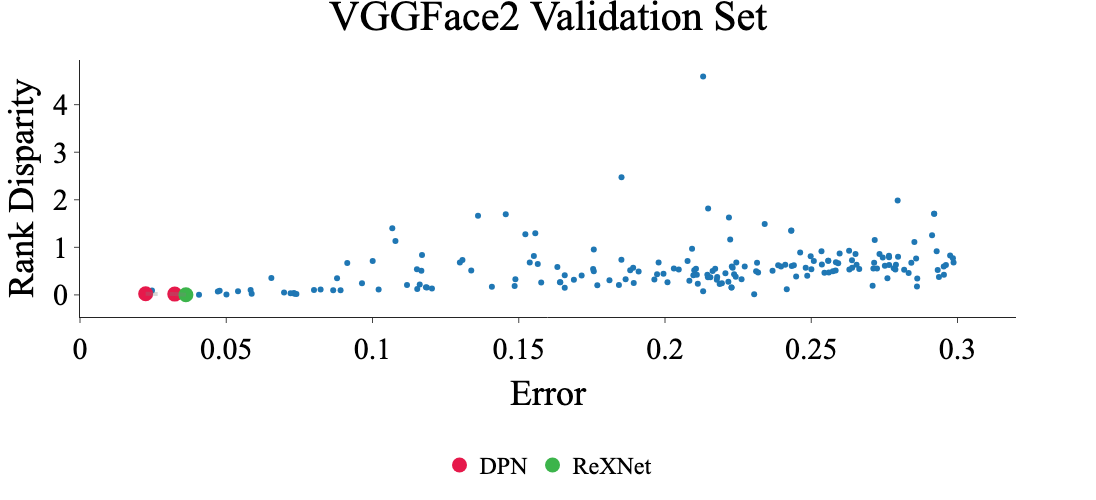

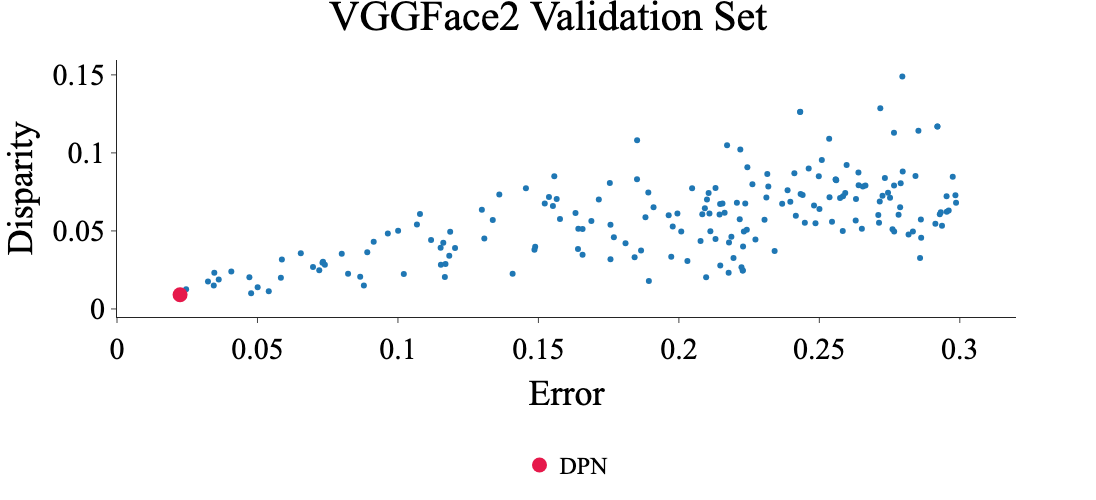

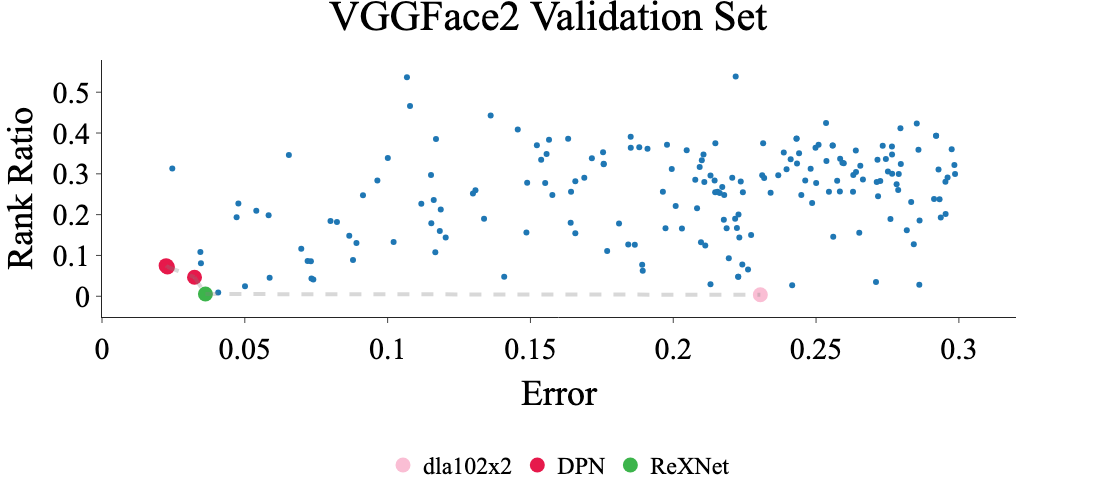

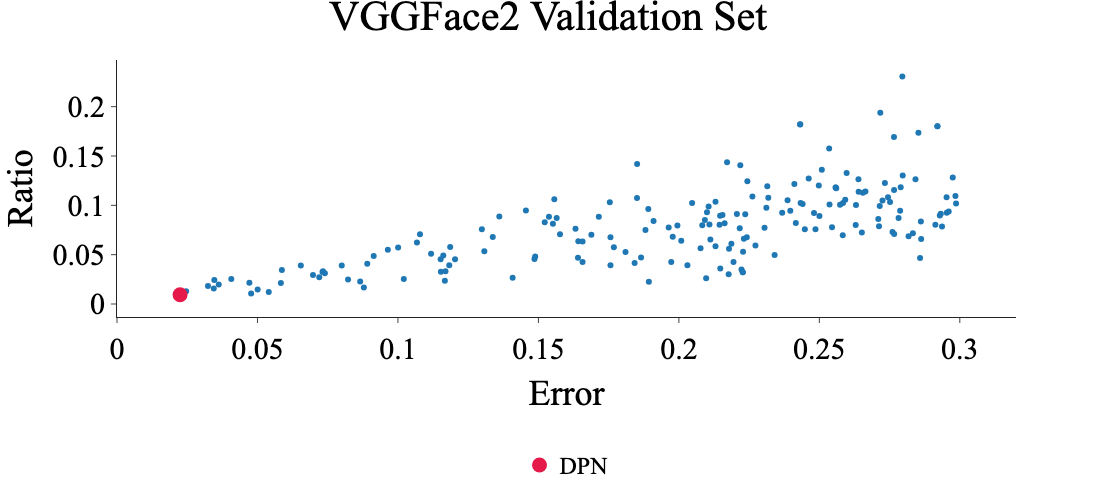

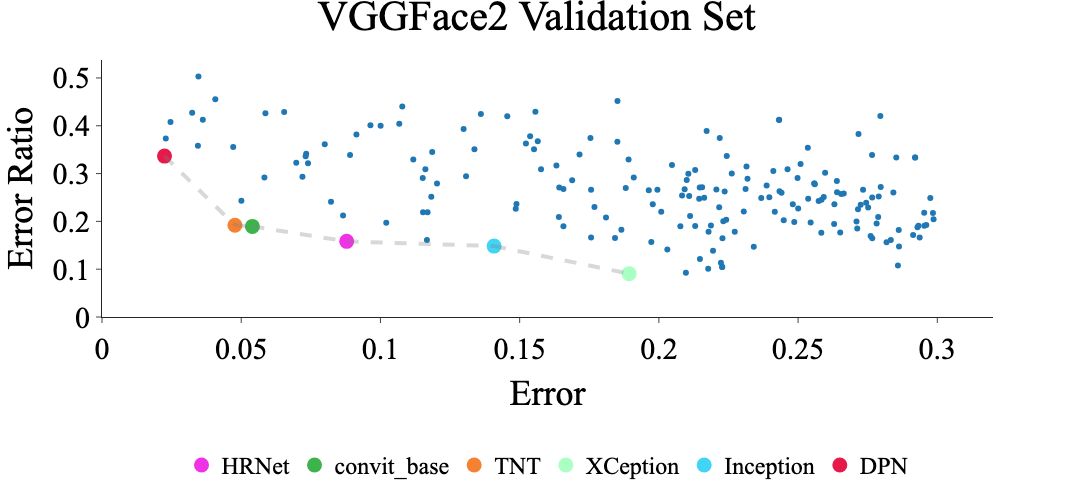

index  epoch     Error  Disparity  \
295               coat_lite_small_CosFace_AdamW     10  0.073333   0.030196   
195  coat_lite_small_CosFace_AdamW_0.001_cosine     10  0.047124   0.020392   
316                     convit_base_CosFace_SGD     10  0.185131   0.108039   
45                    convit_base_CosFace_AdamW     10  0.054020   0.011307   
196      convit_base_CosFace_AdamW_0.001_cosine     10  0.058333   0.019935   
..                                          ...    ...       ...        ...   
147                    xception65_ArcFace_AdamW     10  0.291307   0.054641   
250                      xception65_CosFace_SGD     10  0.184248   0.033203   
110       xception65_MagFace_AdamW_0.001_cosine     10  0.265490   0.078431   
187       xception65_CosFace_AdamW_0.001_cosine     10  0.189314   0.017974   
354       xception65_ArcFace_AdamW_0.001_cosine     10  0.278954   0.080523   

     Rank Disparity     Ratio  Rank Ratio  Error Ratio            model  
295        0.025817  0.033125    0.043608     0.341463  coat_lite_small  
195        0.072745  0.021632    0.193801     0.355758  coat_lite_small  
316        2.475163  0.141998    0.363914     0.451763      convit_base  
45         0.077908  0.012025    0.209711     0.189485      convit_base  
196        0.103987  0.021396    0.198478     0.291866      convit_base  
..              ...       ...         ...          ...              ...  
147        1.254641  0.080192    0.238152     0.171487       xception65  
250        0.210327  0.041547    0.126948     0.165311       xception65  
110        0.634118  0.112803    0.319502     0.257400       xception65  
187        0.252353  0.022420    0.062268     0.090639       xception65  
354        0.635882  0.118280    0.299594     0.252252       xception65  

[189 rows x 9 columns]

In [5]:
phase1_plot('Rank Disparity', '', vgg, show_all=False)
phase1_plot('Disparity','disparity', vgg, show_all=False)
phase1_plot('Rank Ratio', 'rank_ratio', vgg, show_all=False)
phase1_plot('Ratio', 'ratio', vgg, show_all=False)
phase1_plot('Error Ratio', 'error_ratio', vgg, show_all=False)

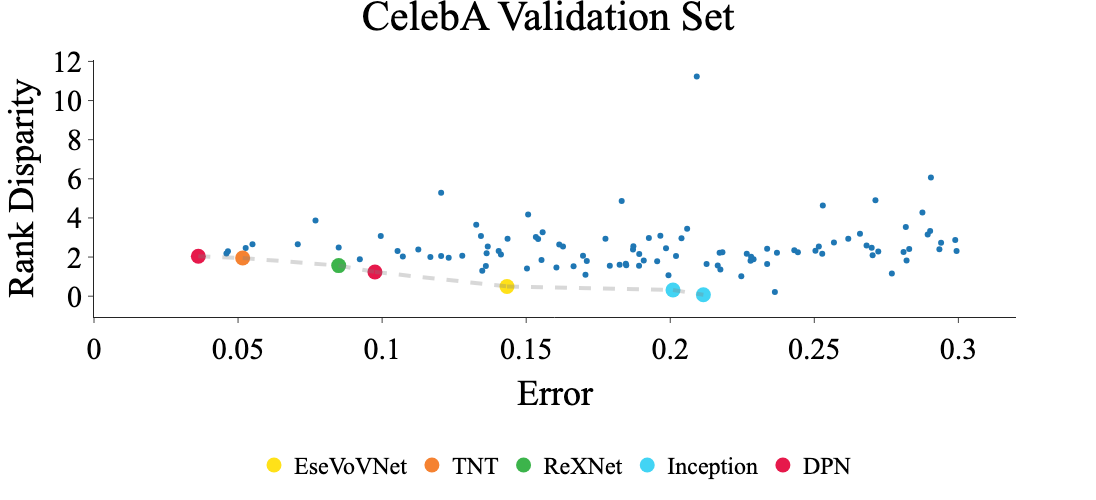

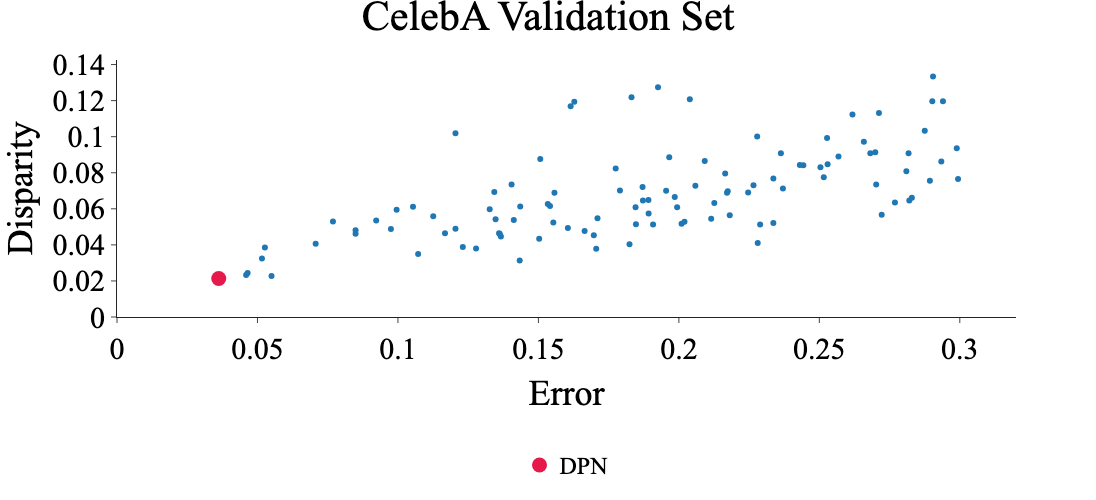

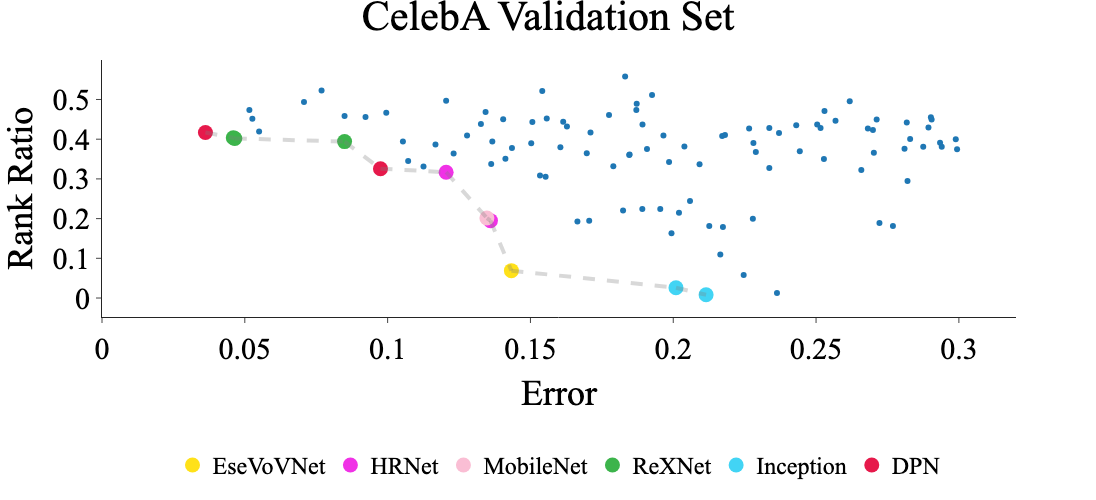

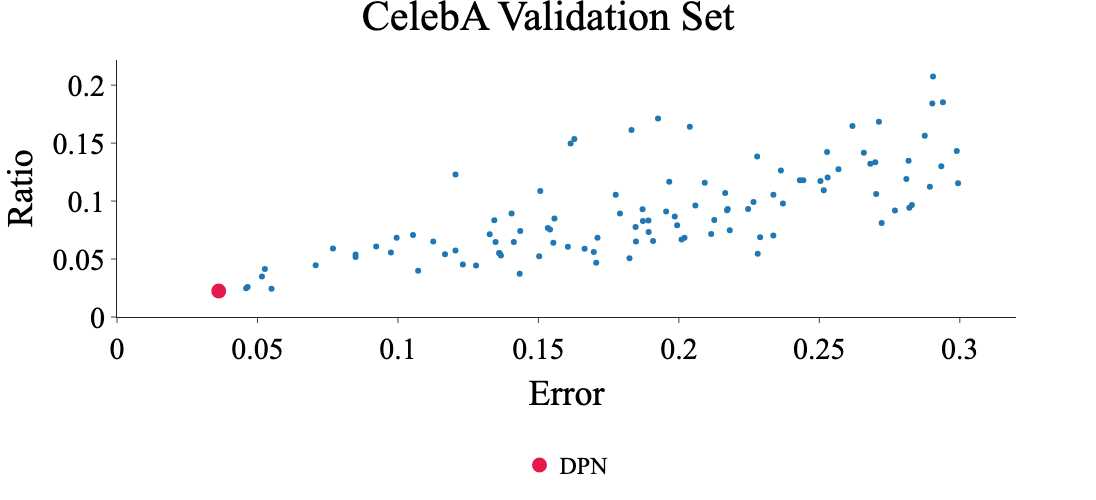

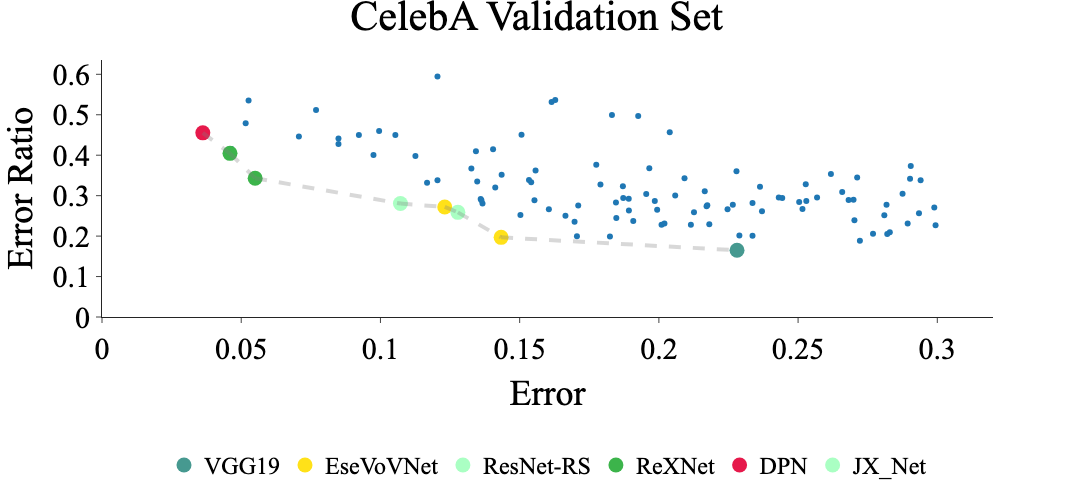

index  epoch     Error  \
343       coat_lite_small_CosFace_AdamW_rank_by_id_val     99  0.120482   
157  coat_lite_small_CosFace_AdamW_0.001_cosine_ran...     99  0.076873   
306         coat_lite_small_CosFace_SGD_rank_by_id_val     99  0.290466   
349             convit_base_CosFace_SGD_rank_by_id_val     99  0.183146   
98   cspdarknet53_MagFace_SGD_0.1_cosine_rank_by_id...     99  0.150275   
..                                                 ...    ...       ...   
177     xception_CosFace_SGD_0.1_cosine_rank_by_id_val     99  0.271215   
236              xception_MagFace_AdamW_rank_by_id_val     99  0.218112   
137     xception_ArcFace_SGD_0.1_cosine_rank_by_id_val     99  0.202004   
64               xception65_ArcFace_SGD_rank_by_id_val     99  0.226558   
204              xception65_CosFace_SGD_rank_by_id_val     99  0.287520   

     Disparity  Rank Disparity     Ratio  Rank Ratio  Error Ratio  \
343   0.101886        5.292562  0.122965    0.497079     0.594347   
157   0.052907        3.864065  0.059004    0.522637     0.512041   
306   0.133316        6.061027  0.207374    0.449759     0.373304   
349   0.121922        4.870613  0.161296    0.557635     0.499464   
98    0.043347        1.419068  0.052349    0.390051     0.252094   
..         ...             ...       ...         ...          ...   
177   0.113148        4.909508  0.168323    0.449627     0.345186   
236   0.056443        2.245678  0.074891    0.410740     0.229133   
137   0.052776        2.051205  0.068398    0.214877     0.231078   
64    0.073075        2.163305  0.099165    0.426803     0.277750   
204   0.103326        4.281954  0.156361    0.381257     0.304633   

               model  
343  coat_lite_small  
157  coat_lite_small  
306  coat_lite_small  
349      convit_base  
98      cspdarknet53  
..               ...  
177         xception  
236         xception  
137         xception  
64        xception65  
204       xception65  

[107 rows x 9 columns]

In [6]:
phase1_plot('Rank Disparity', '', celeba, dataset='CelebA', show_all=False, epoch=99)
phase1_plot('Disparity','disparity', celeba, dataset='CelebA', show_all=False, epoch=99)
phase1_plot('Rank Ratio', 'rank_ratio', celeba, dataset='CelebA', show_all=False, epoch=99)
phase1_plot('Ratio', 'ratio', celeba, dataset='CelebA', show_all=False, epoch=99)
phase1_plot('Error Ratio', 'error_ratio', celeba, dataset='CelebA', show_all=False, epoch=99)

# Phase 2

### VGGFace2

In [7]:
def phase2_plot(metric_name, metric_suffix, split, df):
    colors = ['#e6194B', '#3cb44b', '#ffe119','#f58231','#42d4f4',
              '#f032e6','#fabed4','#469990','#aaffc3','#000075','#e6194B','#9a6324','#dcbeff', '#42d4f4']
    plotted_models = ['DPN','ReXNet', 'Other', 'TNT', 'Inception', 'HRNet', 'EseVoVNet', 'VGG19', 'ResNet-RS', 
                     'DenseNet', 'DPN_MagFace', 'DPN_CosFace', 'SMAC', 'Swin_Transformer']
    color_map = {}
    for c,m in zip(colors,plotted_models):
        color_map[m] = c
    fig = px.scatter(df, 
                     x='Error_mean', 
                     y=f'{metric_name}_mean', 
                     error_x = "Error_std", 
                     error_y = f"{metric_name}_std", 
                     color="Model", 
                     color_discrete_map=color_map,
                     template="simple_white",
                     width=1200, height= 1000
                    )
    # if metric_name == 'Rank Disparity':
    #     fig.update_layout(
    #         xaxis_range=[0,0.15],
    #         yaxis_range=[-.01,.8]
    #     )
    fig.update_layout(
        xaxis_title="Error",
        yaxis_title=metric_name,
        legend_title="Models",
        font=dict(
            family="Times New Roman",
            size=38,
            color="Black"
        )
    )
    fig.update_traces(marker=dict(size=20))
    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        font=dict(
            family="Times New Roman",
            size=28,
            color="Black"
        )
    ))
    p = np.array(preparePareto(df[['Error_mean',f'{metric_name}_mean']], False, False).dropna())
    for x, y in zip(p[:-1], p[1:]):
        fig.add_shape(type='line',
                    x0=x[0],y0=x[1],x1=y[0],y1=y[1],
                    line=dict(color='gray',width=4),line_dash='dash',
                    xref='x',yref='y')
    # plotly.io.write_image(fig, f'_RQ2_{split}_vgg_{metric_suffix}.png', format='png')
    fig.show()

In [8]:
vgg_val = pd.read_csv('vgg_val_phase2.csv')
vgg_test = pd.read_csv('vgg_test_phase2.csv')

lookup = {
    'SMAC': 'SMAC',
    'coat_lite_small': 'Other',
    'convit_base': 'Other',
    'cspdarknet53': 'Other',
    'dla102x2': 'Other',
    'DPN_ArcFace': 'Other',
    'DPN_MagFace': 'DPN_MagFace',
    'DPN_CosFace': 'DPN_CosFace',
    'ese_vovnet39b': 'EseVoVNet',
    'hrnet_w64': 'HRNet',
    'jx_nest_base': 'Other',
    'rexnet_200': 'ReXNet',
    'swin_base_patch4_window7_224': 'Swin_Transformer',
    'tf_efficientnet_b7_ns': 'Other',
    'tnt_s_patch16_224': 'TNT',
    'twins_svt_large': 'Other'
}

vgg_val['Model'] = vgg_val['Model'].apply(lambda l: lookup[l])
vgg_test['Model'] = vgg_test['Model'].apply(lambda l: lookup[l])


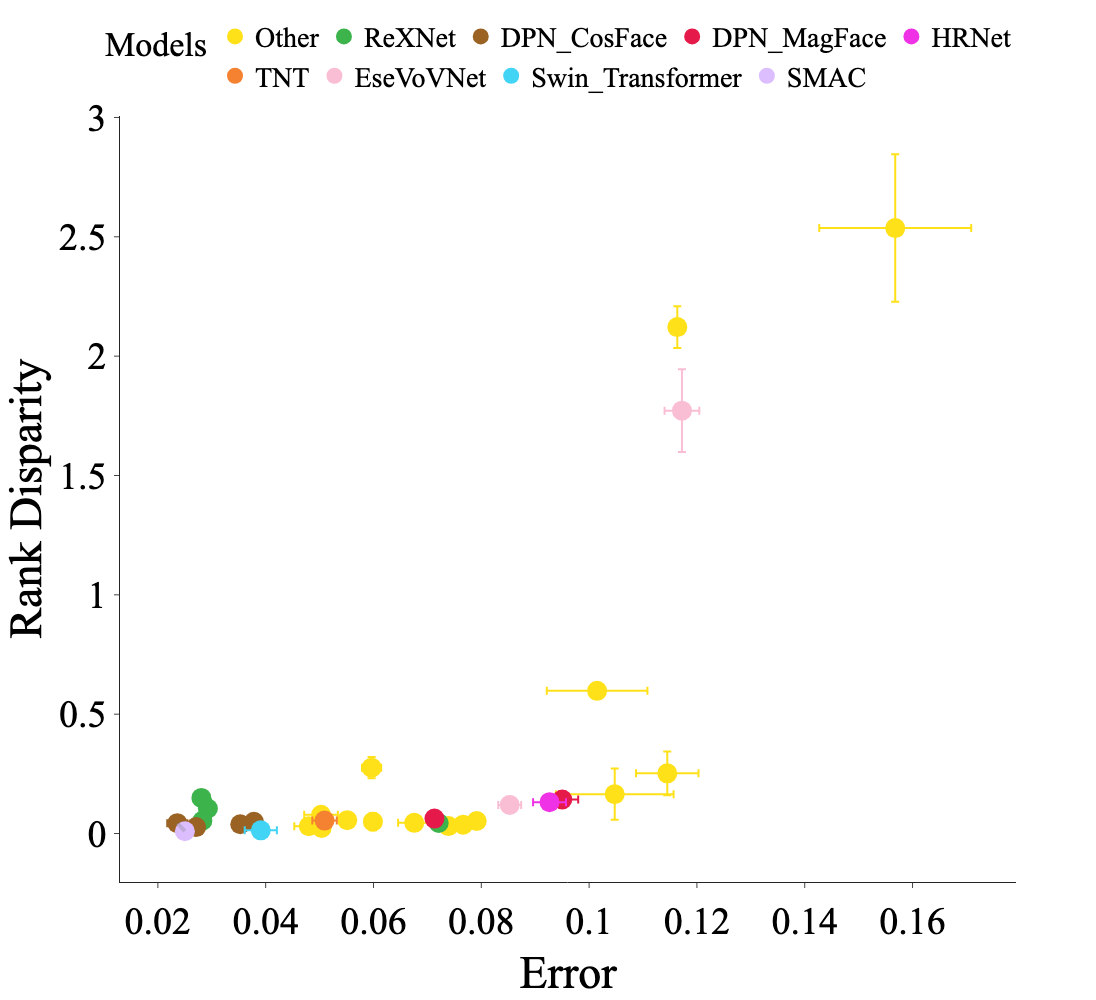

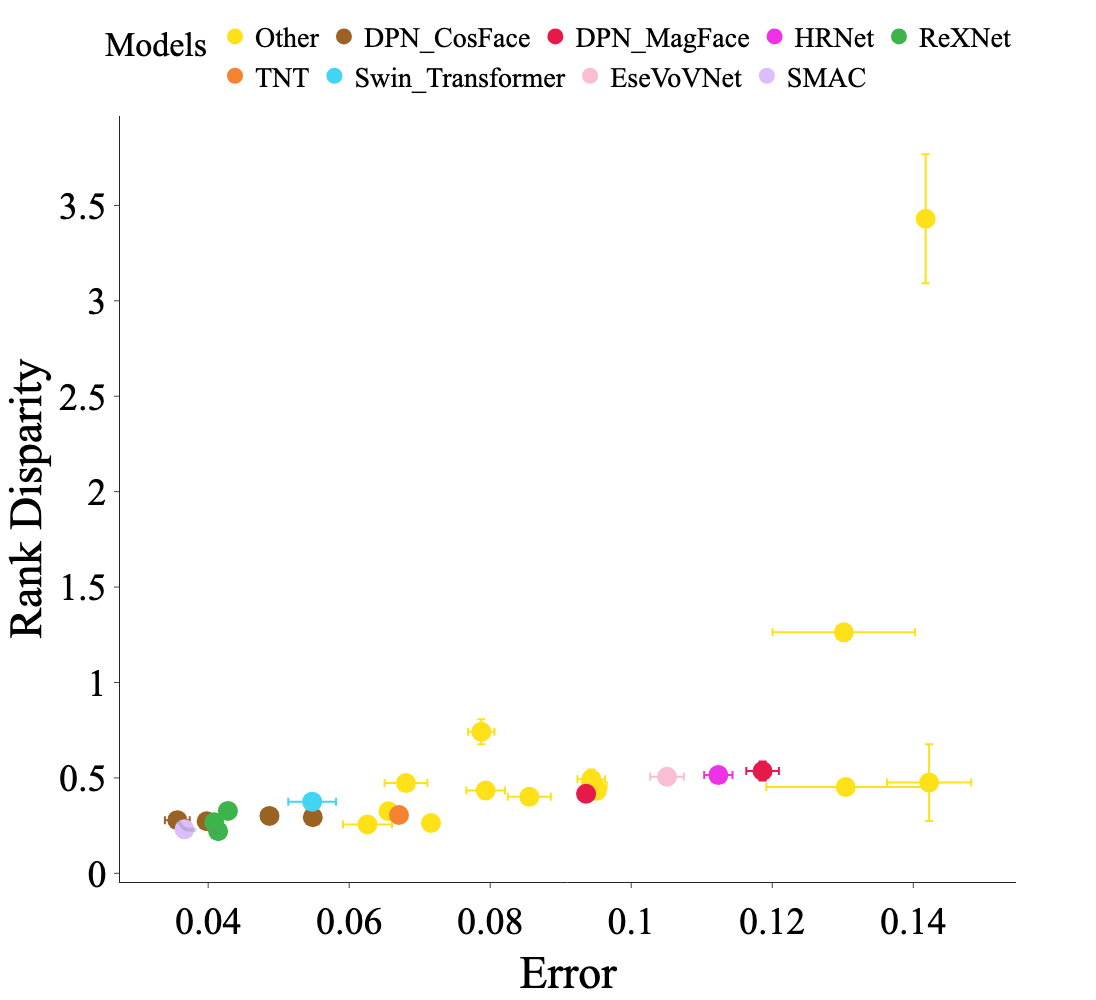

In [9]:
phase2_plot('Rank Disparity', 'rankdisparity', 'val', vgg_val)
phase2_plot('Rank Disparity', 'rankdisparity', 'val', vgg_test)

### CelebA

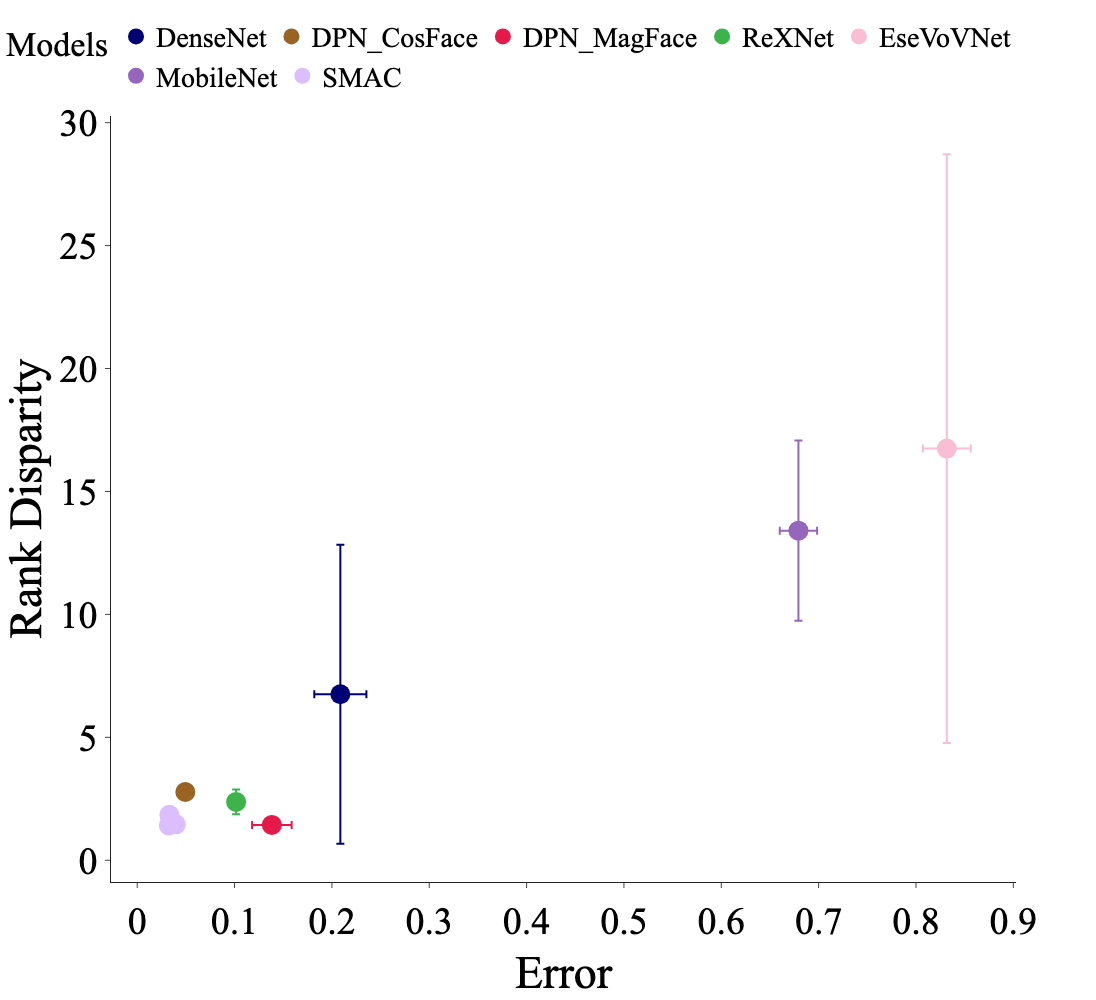

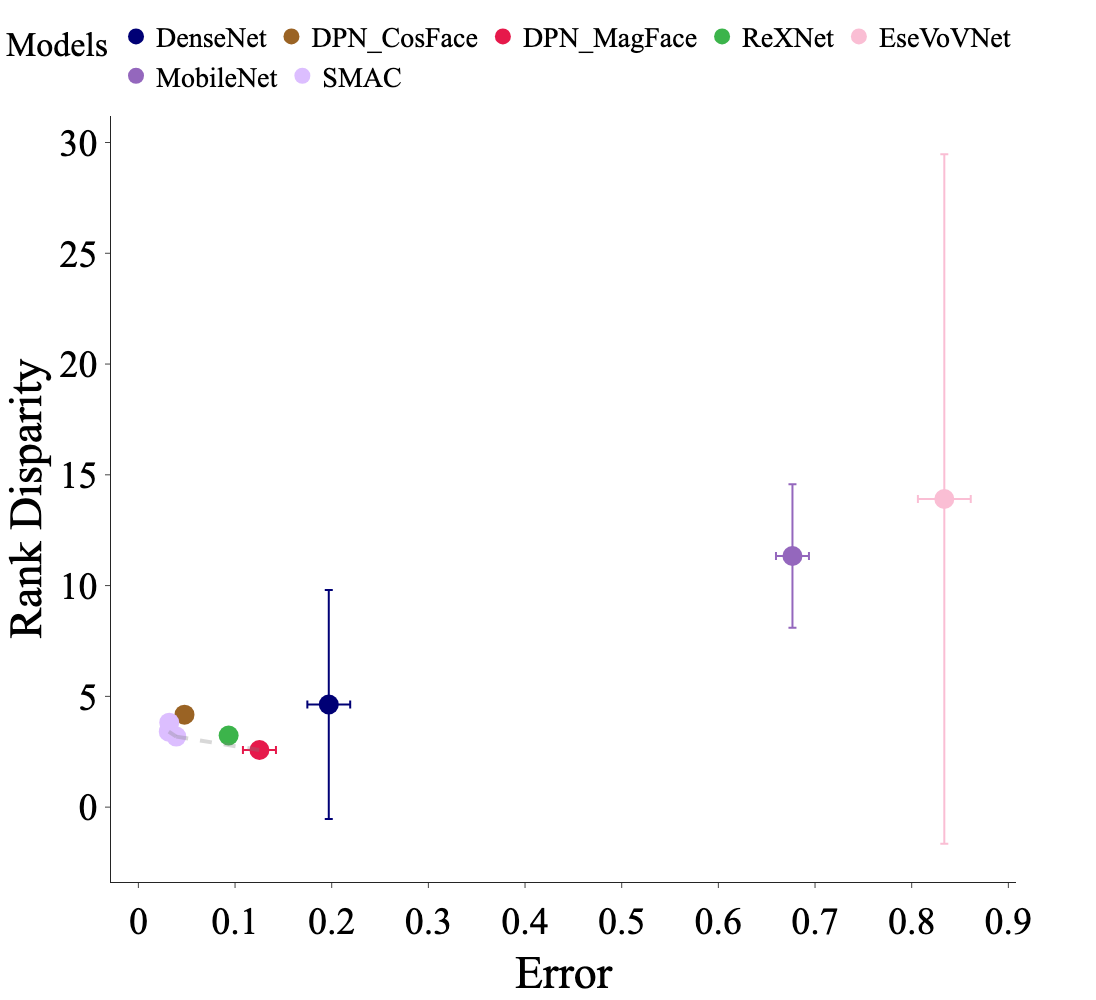

In [10]:
celeba_val = pd.read_csv('celeba_val_phase2.csv')
celeba_test = pd.read_csv('celeba_test_phase2.csv')

lookup = {
    'model_000': 'SMAC',
    'model_010': 'SMAC',
    'model_680': 'SMAC',
    'densenet': 'DenseNet',
    'dpn107_CosFace_SGD': 'DPN_CosFace',
    'dpn107_MagFace_SGD': 'DPN_MagFace',
    'rexnet_200': 'ReXNet',
    'ese_vovnet39b': 'EseVoVNet',
    'mobilenetv3_large_100': 'MobileNet',
}

celeba_val['Model'] = celeba_val['Model name'].apply(lambda l: lookup[l])
celeba_test['Model'] = celeba_test['Model name'].apply(lambda l: lookup[l])


phase2_plot('Rank Disparity', 'rankdisparity', 'val', celeba_val)
phase2_plot('Rank Disparity', 'rankdisparity', 'val', celeba_test)

# Transfer to other datasets

In [11]:
def transfer_to_rfw_plot(metric_name, metric_suffix, split, df, train_ds='CelebA'):
    colors = ['#e6194B', '#3cb44b', '#ffe119','#f58231','#42d4f4',
          '#f032e6','#fabed4','#469990','#aaffc3','#000075','#e6194B','#9a6324','#dcbeff', '#42d4f4']
    plotted_models = ['DPN','ReXNet', 'Other', 'TNT', 'Inception', 'HRNet', 'EseVoVNet', 'VGG19', 'ResNet-RS', 
                     'DenseNet', 'DPN_MagFace', 'DPN_CosFace', 'SMAC', 'Swin_Transformer']
    color_map = {}
    for c,m in zip(colors,plotted_models):
        color_map[m] = c
    fig = px.scatter(df, 
                     x='Error_mean', 
                     y=f'{metric_name}_mean', 
                     error_x = "Error_std", 
                     error_y = f"{metric_name}_std", 
                     color="Model", 
                     color_discrete_map=color_map,
                     template="simple_white",
                     width=1200, height= 1000
                    )
    fig.update_layout(
        xaxis_title="Error",
        yaxis_title=metric_name,
        title=f"Trained on {train_ds}; Tested on RFW",
        legend_title="Models",
        font=dict(
            family="Times New Roman",
            size=30,
            color="Black"
        )
    )
    fig.update_traces(marker=dict(size=20))
    p = np.array(preparePareto(df[['Error_mean',f'{metric_name}_mean']], False, False).dropna())
    for x, y in zip(p[:-1], p[1:]):
        fig.add_shape(type='line',
                    x0=x[0],y0=x[1],x1=y[0],y1=y[1],
                    line=dict(color='gray',width=4),line_dash='dash',
                    xref='x',yref='y')
#     plotly.io.write_image(fig, f'_RQ2_{split}_vgg_{metric_suffix}.png', format='png')
    fig.show()

### Transfer CelebA to RFW

In [12]:
celeba_to_rfw = pd.read_csv('celeba_transfer_rfw_test.csv')

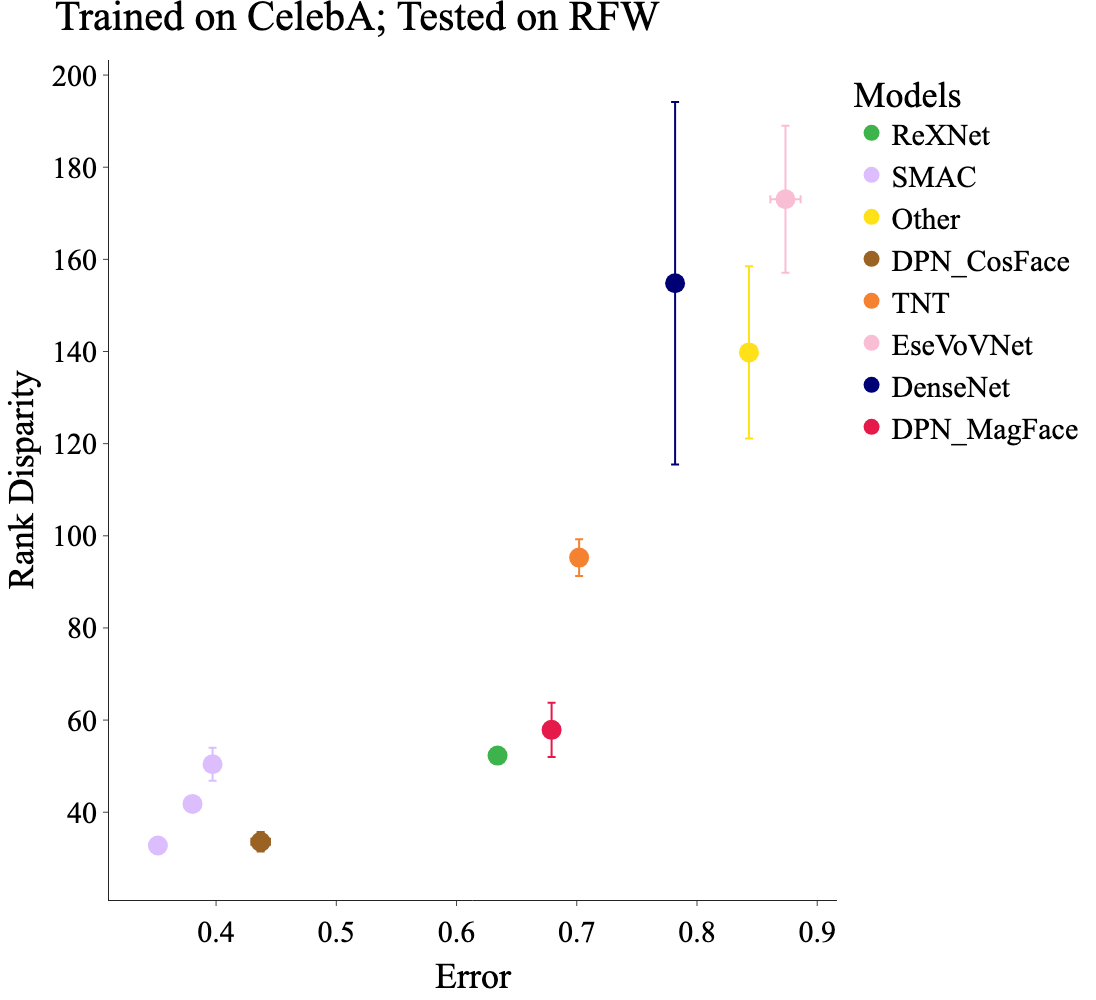

In [13]:
transfer_to_rfw_plot('Rank Disparity', '', 'test', celeba_to_rfw)

### Transfer VGGFace2 to RFW

In [14]:
vgg_to_rfw = pd.read_csv('vgg_transfer_rfw_test.csv')

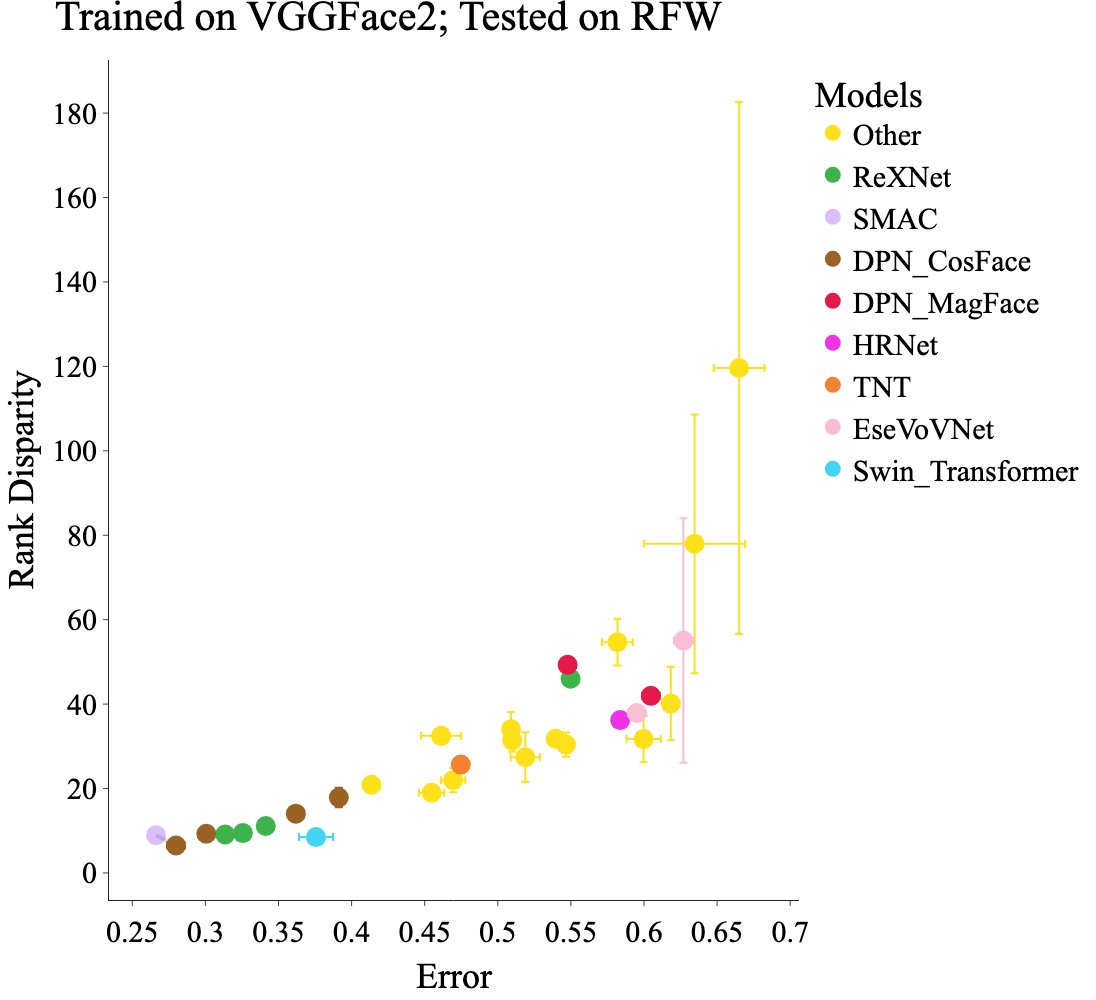

In [15]:
transfer_to_rfw_plot('Rank Disparity', '', 'test', vgg_to_rfw, train_ds='VGGFace2')